# Overfitting / Underfitting using KNN

The impact of selecting a smaller or larger K value on the model:
- **Larger K value:** The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.
- **Smaller k value:** The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.

## Importing and loading data

In [5]:
# Importing libraries 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('datasets/data_cleaned.csv')

# Check the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


## Model building

### Segregating variables - Dependent & Independent variables

In [4]:
# Seperating independent and dependent variables
X = data.drop(['Survived'], axis=1)
y = data['Survived']

print(X.shape, y.shape)

(891, 24) (891,)


### Scaling the data

In [6]:
# Use the StandardScaler Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

print(x_scaled[:100])

[[-0.5924806  -0.50244517 -0.56568542 ... -0.48204268 -0.30756234
   0.61583843]
 [ 0.63878901  0.78684529  1.76776695 ...  2.0745051  -0.30756234
  -1.62380254]
 [-0.2846632  -0.48885426 -0.56568542 ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [-0.51552625  0.6272779   1.76776695 ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.33097161 -0.18532385 -0.56568542 ... -0.48204268 -0.30756234
   0.61583843]
 [ 0.33097161 -0.12491979 -0.56568542 ... -0.48204268 -0.30756234
   0.61583843]]


### Creating training and testing data

In [7]:
# Split the data 
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = 56, stratify = y)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(668, 24) (668,)
(223, 24) (223,)


### Implementing KNN

In [8]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training F1 Score', k )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Training F1 Score 0.82092555332
Test F1 Score     0.708074534161


In [10]:
# Predicting over the training and test set and calculating F1
test_predict = clf.predict(test_x)
train_predict = clf.predict(train_x)

# Calculate the F1 score
f1_test = f1_score(test_predict, test_y)
f1_train = f1_score(train_predict, train_y)

print('Test F1-Score:', round(f1_test, 3))
print('Train F1-Score:', round(f1_train, 3))

Test F1-Score: 0.617
Train F1-Score: 0.778


### Checking the Training-F1 and Test-F1 curve

In [31]:
def F1score(K):
    '''
      Takes an input K consisting of a range of K values for KNN
      Input:
          K = list
  
      Returns: lists containing F1 corresponding to every value of K
          train_f1: list of train f1 score corresponding K
          test_f1: list of test f1 score corresponding to K
    '''
    # Initiating empty list
    train_f1 = []
    test_f1 = []
  
    # Training model for evey value of K
    for i in K:
        # Instance of KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        
        # Appending F1 scores to empty list 
        # calculated using the predictions
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp, train_y)
        train_f1.append(tmp)
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

# Defining K range
k = range(1,150)

# Calling above defined function
train_f1, test_f1 = F1score(k)

In [32]:
# Create a dataframe consisting of all the scores
score_df = pd.DataFrame({'Training Score': train_f1, 'Testing Score': test_f1}, index = k)

# Check the data
score_df.head(10)

,Training Score,Testing Score
1,0.978474,0.555556
2,0.693878,0.437500
3,0.777547,0.617143
4,0.674641,0.475524
5,0.714286,0.604651
6,0.662005,0.503401
7,0.703158,0.547619
8,0.620047,0.510949
9,0.675214,0.569620
10,0.651584,0.531469


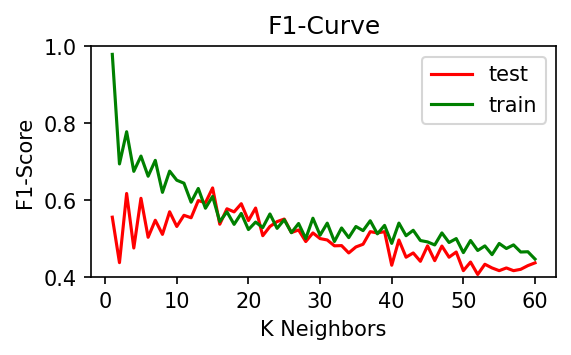

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

# plotting the curves
plt.figure(figsize = (4,2), dpi = 150)
plt.plot(k[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train_f1[0:60], color = 'green', label = 'train')

plt.xlabel('K Neighbors')
plt.ylabel('F1-Score')
plt.title('F1-Curve')
plt.ylim(0.4,1)

plt.legend()

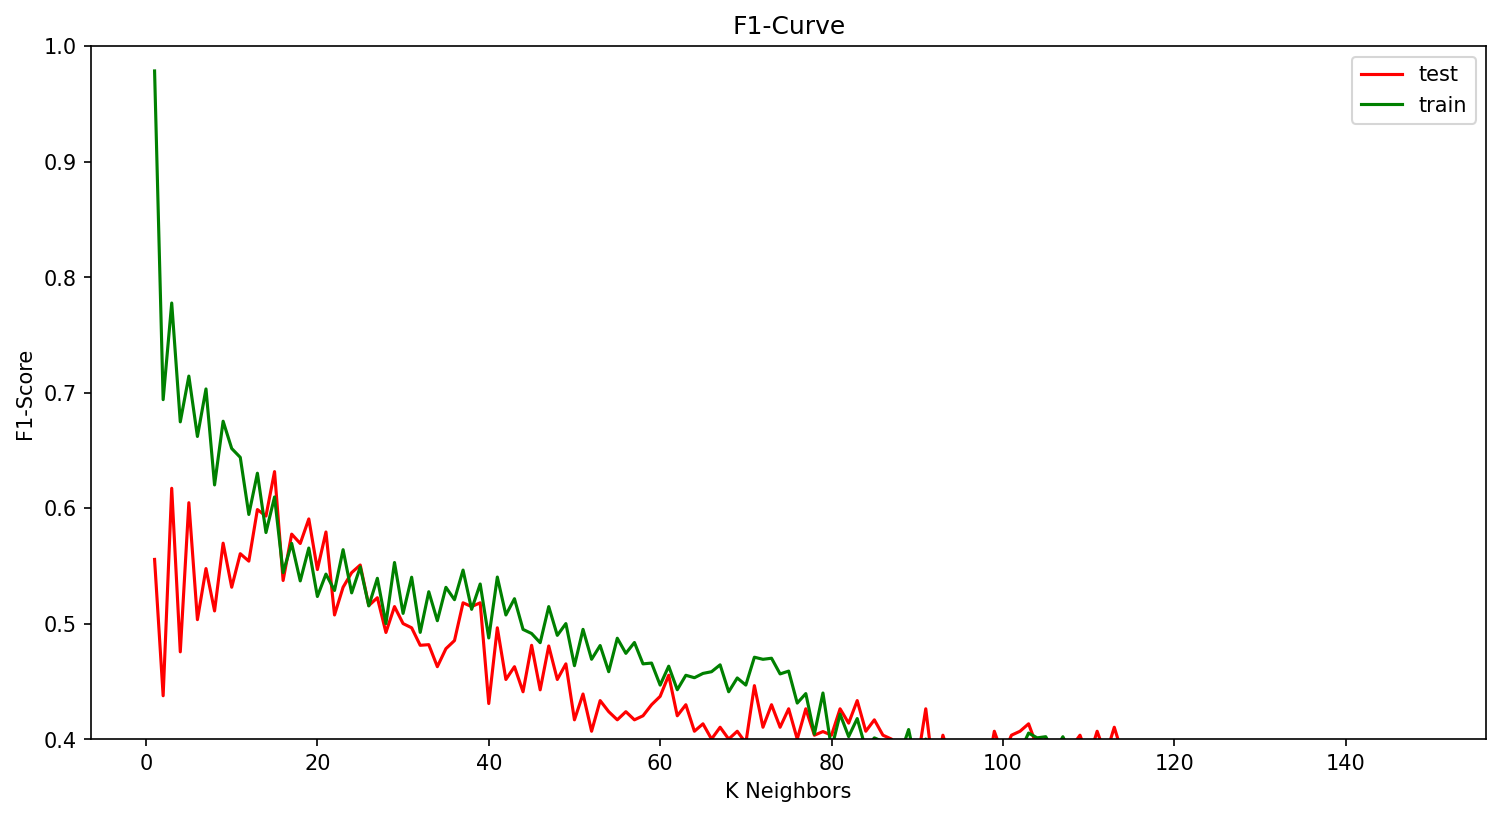

In [35]:
# plotting the curves
plt.figure(figsize = (12, 6), dpi = 150)
plt.plot(k, test_f1, color = 'red' , label = 'test')
plt.plot(k, train_f1, color = 'green', label = 'train')

plt.xlabel('K Neighbors')
plt.ylabel('F1-Score')
plt.title('F1-Curve')
plt.ylim(0.4,1)

plt.legend()

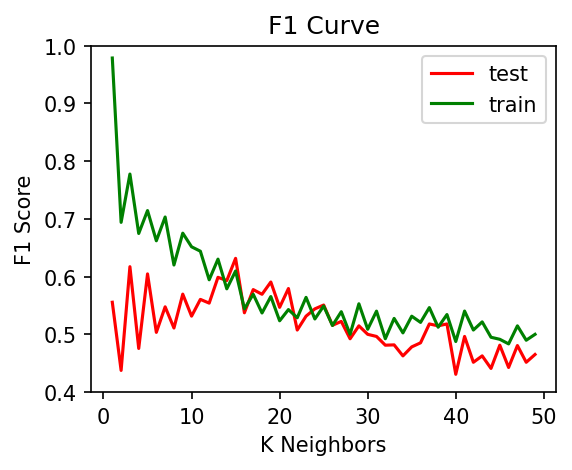

In [29]:
# calling above defined function
K = range(1, 50)
train_f1, test_f1 = F1score(K)

# plotting the Curves
plt.figure(figsize = (4, 3), dpi = 150)
plt.plot(K, test_f1, color = 'red' , label = 'test')
plt.plot(K, train_f1, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()